# K-means clustering project to group customer segmentation
### 1. Making random data with 100000 rows to analyze

In [64]:
import pandas as pd
import numpy as np

# Generating a synthetic dataset for customer data suitable for K-means clustering
np.random.seed(42)

# Define the size of the dataset
size = 10000  

# Define some random customer features
data = {
    'Age': np.random.randint(18, 70, size=10000),  # Age between 18 and 70
    'Annual_Income': np.random.randint(30000, 100000, size=10000),  # Annual income between $30,000 and $100,000
    'Spending_Score': np.random.randint(1, 100, size=10000),  # Spending score between 1 and 100
    'Years_as_Customer': np.random.randint(1, 20, size=10000),  # Years as customer between 1 and 20
    'Total_Transactions': np.random.randint(1, 50, size=10000),  # Total number of transactions between 1 and 50
    'Returned_Items': np.random.randint(0, 10, size=10000),  # Number of returned items between 0 and 10
    'Online_Orders': np.random.randint(0, 100, size=10000),  # Number of online orders between 0 and 100
    'In_Store_Purchases': np.random.randint(0, 50, size=10000),  # Number of in-store purchases between 0 and 50
    'Product_Ratings': np.random.uniform(1.0, 5.0, size=10000),  # Average product rating between 1.0 and 5.0
    'Complaints_Received': np.random.randint(0, 5, size=10000)  # Number of complaints received between 0 and 5
}

# Creating DataFrame
customer_df = pd.DataFrame(data)




In [66]:
# Save the DataFrame to a CSV file
customer_df.to_csv(r"C:\Users\dinht\OneDrive\Desktop\học data\Học Python\k-cluster\Customer_Data_for_Clustering.csv", index=False)

In [68]:
# Add Customer ID starting from 1 and incrementing by 1 for each row
customer_df['Customer_ID'] = np.arange(1, size + 1)

In [70]:
customer_df.head()

,Age,Annual_Income,Spending_Score,Years_as_Customer,Total_Transactions,Returned_Items,Online_Orders,In_Store_Purchases,Product_Ratings,Complaints_Received,Customer_ID
0,56,39930,10,10,33,0,21,25,3.519486,3,1
1,69,33285,4,14,48,5,0,30,3.303820,0,2
2,46,65863,67,1,3,0,20,7,1.550864,2,3
3,32,46704,25,5,2,7,47,34,3.781518,3,4
4,60,48705,87,13,38,9,82,33,2.441743,4,5


In [72]:
# Move 'Customer_ID' to the first position
columns = ['Customer_ID'] + [col for col in customer_df if col != 'Customer_ID']
customer_df = customer_df[columns]

In [74]:
customer_df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Total_Transactions,Returned_Items,Online_Orders,In_Store_Purchases,Product_Ratings,Complaints_Received
0,1,56,39930,10,10,33,0,21,25,3.519486,3
1,2,69,33285,4,14,48,5,0,30,3.303820,0
2,3,46,65863,67,1,3,0,20,7,1.550864,2
3,4,32,46704,25,5,2,7,47,34,3.781518,3
4,5,60,48705,87,13,38,9,82,33,2.441743,4


### 2. Explore data

In [76]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          10000 non-null  int32  
 1   Age                  10000 non-null  int32  
 2   Annual_Income        10000 non-null  int32  
 3   Spending_Score       10000 non-null  int32  
 4   Years_as_Customer    10000 non-null  int32  
 5   Total_Transactions   10000 non-null  int32  
 6   Returned_Items       10000 non-null  int32  
 7   Online_Orders        10000 non-null  int32  
 8   In_Store_Purchases   10000 non-null  int32  
 9   Product_Ratings      10000 non-null  float64
 10  Complaints_Received  10000 non-null  int32  
dtypes: float64(1), int32(10)
memory usage: 468.9 KB


In [78]:
customer_df.describe(include = 'all').round(2)

,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Total_Transactions,Returned_Items,Online_Orders,In_Store_Purchases,Product_Ratings,Complaints_Received
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,43.54,64432.58,49.63,10.07,24.96,4.52,49.63,24.60,2.99,1.98
std,2886.90,14.91,20293.92,28.74,5.42,14.14,2.86,28.94,14.35,1.15,1.42
min,1.00,18.00,30002.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
25%,2500.75,31.00,46704.75,25.00,5.00,13.00,2.00,24.00,12.00,2.01,1.00
50%,5000.50,43.00,64189.00,49.00,10.00,25.00,5.00,49.00,25.00,2.99,2.00
75%,7500.25,56.00,81888.00,75.00,15.00,37.00,7.00,75.00,37.00,4.00,3.00
max,10000.00,69.00,99998.00,99.00,19.00,49.00,9.00,99.00,49.00,5.00,4.00


In [80]:
#checking null and nah in dataset
customer_df.isnull().values.any()

False

In [82]:
customer_df.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Spending_Score',
       'Years_as_Customer', 'Total_Transactions', 'Returned_Items',
       'Online_Orders', 'In_Store_Purchases', 'Product_Ratings',
       'Complaints_Received'],
      dtype='object')

In [84]:
features = ['Age', 'Annual_Income', 'Spending_Score']

In [86]:
customers = customer_df.dropna(subset=features)

In [88]:
data = customers[features].copy()

In [90]:
data

,Age,Annual_Income,Spending_Score
0,56,39930,10
1,69,33285,4
2,46,65863,67
3,32,46704,25
4,60,48705,87
...,...,...,...
9995,55,75099,59
9996,51,43188,71
9997,57,81188,22
9998,64,35560,90


### 3.Choose the right number of cluster by:
#### The Within Cluster Sum of Squares (WCSS)
#### The Average Silhouette Score
#### The Calinski Harabasz Score

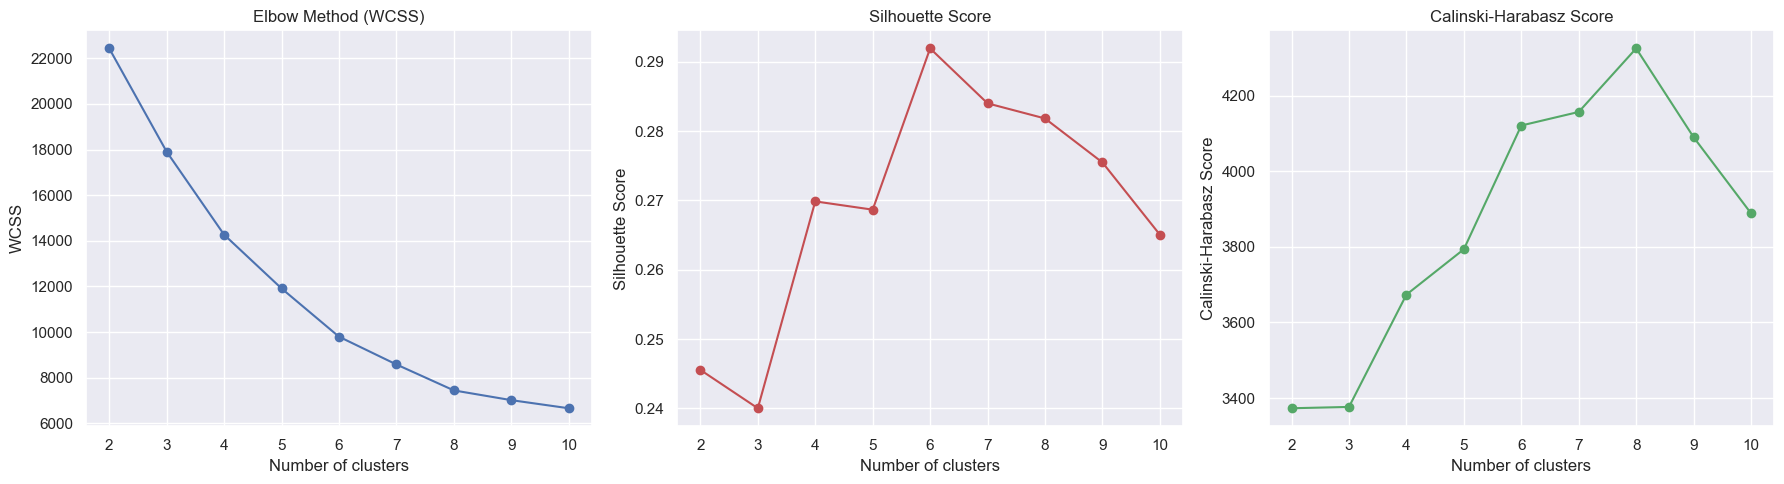

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(data)

# Range of potential clusters
range_clusters = range(2, 11)

wcss = []
silhouette_scores = []
calinski_harabasz_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(customers_scaled)
    
    # WCSS
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(customers_scaled, cluster_labels))
    
    # Calinski-Harabasz Score
    calinski_harabasz_scores.append(calinski_harabasz_score(customers_scaled, cluster_labels))

# Plotting the metrics
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(range_clusters, calinski_harabasz_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

When selecting the optimal number of clusters for our dataset, we assessed three metrics: the Elbow Method (WCSS), Silhouette Score, and Calinski-Harabasz Score.

Elbow Method (WCSS) suggests a subtle elbow at 5 clusters, indicating diminishing returns with additional clusters.
Silhouette Score peaks at 4 clusters, signifying the best balance between cohesion within clusters and separation between them.
Calinski-Harabasz Score reaches its highest at 7 clusters, suggesting well-defined and separated clusters.
Given these insights, # 4 clusters are recommended. This number offers a practical balance, providing clear, manageable groups with strong internal consistency. This recommendation aligns with the peak Silhouette Score, emphasizing optimal cluster separation and internal cohesion.

### 4.Scale data to standardize values

In [101]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1


In [103]:
data.describe()

,Age,Annual_Income,Spending_Score
count,10000.000000,10000.000000,10000.000000
mean,5.506953,5.427041,5.466094
std,2.631465,2.609368,2.639009
min,1.000000,1.000000,1.000000
25%,3.294118,3.147619,3.204082
50%,5.411765,5.395723,5.408163
75%,7.705882,7.671438,7.795918
max,10.000000,10.000000,10.000000


### 5.Initialize random centroids

initializing random centroids is essential for the k-means algorithm to effectively partition the data into clusters, explore different clustering solutions, and ultimately find a meaningful representation of the data structure.

In [106]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [108]:
centroids = random_centroids(data, 4)

C:\Users\dinht\AppData\Local\Temp\ipykernel_15956\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [110]:
centroids

,0,1,2,3
Age,6.294118,2.235294,1.529412,2.235294
Annual_Income,2.443682,9.478356,1.910852,8.589748
Spending_Score,9.448980,9.632653,8.346939,9.448980


### 6.Get labels for each data point

obtaining labels for each data point is essential for understanding, evaluating, and visualizing the results of the k-means clustering process, as well as for enabling further analysis and refinement of the clustering solution.

In [112]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [114]:
labels = get_labels(data, centroids)

In [116]:
labels.value_counts()

0    4366
3    3109
2    2184
1     341
Name: count, dtype: int64

### 7.Create new centroids

In [118]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

### 8.Plot the centroids

In [120]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [122]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

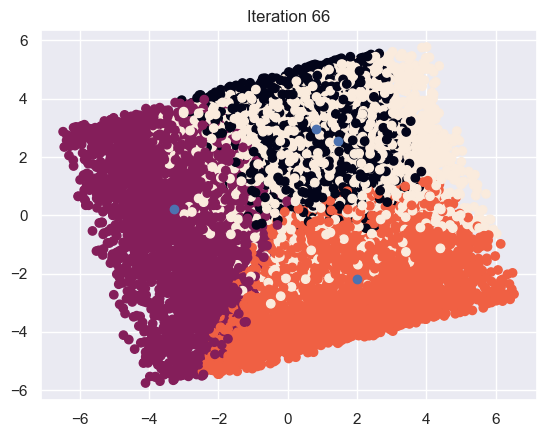

In [126]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [128]:
centroids

,0,1,2,3
Age,3.060409,4.388590,8.223067,3.377008
Annual_Income,2.759483,3.766660,4.714664,8.011775
Spending_Score,2.804496,8.155086,3.836665,4.135947


In [130]:
labels.value_counts()

2    3064
1    2996
3    2522
0    1418
Name: count, dtype: int64

In [152]:
customers[labels == 3][["Customer_ID"] + features]

,Customer_ID,Age,Annual_Income,Spending_Score
7,8,56,96922,61
8,9,36,83915,38
10,11,28,89274,23
18,19,19,97863,76
19,20,41,69220,8
...,...,...,...,...
9980,9981,31,90115,19
9986,9987,23,91836,40
9989,9990,23,90878,66
9991,9992,35,71514,58


In [154]:
from sklearn.cluster import KMeans

In [156]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [158]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3
Age,7.649173,3.525302,3.250261,7.450631
Annual_Income,6.371911,3.059334,7.815923,4.698679
Spending_Score,7.876618,6.475279,4.616042,3.017418


Cluster Overview:
Cluster 0: High Age, Moderate Annual Income, High Spending Score.
Cluster 1: Low Age, Low Annual Income, Moderate Spending Score.
Cluster 2: Low Age, High Annual Income, Low Spending Score.
Cluster 3: Moderate Age, Moderate Annual Income, Low Spending Score.
Detailed Analysis:
Cluster 0 (High Age, High Spending)

This group comprises older individuals with moderate to high incomes who are also high spenders. This suggests they might be well-established, financially secure, and not hesitant to spend on quality or luxury items.
Cluster 1 (Young, Lower Income)

Featuring the youngest and lowest earners who still maintain a moderate spending score. These might be young adults or fresh graduates who are early in their careers, possibly living a lifestyle supported by higher spending relative to their income.
Cluster 2 (Young, Affluent, Economical)

Despite being young and high earners, this cluster has the lowest spending scores. This could indicate young professionals who are high earners but are more conservative with their spending, possibly saving for future investments or big purchases.
Cluster 3 (Middle Age, Moderate Income and Spending)

Individuals in this cluster are middle-aged with moderate income and spending habits. They likely represent the average working-class adults who balance their budget between savings and expenditures effectively.
Implications:
Marketing Strategies: Knowing the spending habits and economic profiles of each cluster can help tailor marketing strategies. For example, luxury goods could be marketed to Cluster 0, while budget-friendly, high-value products might be more appealing to Clusters 1 and 2.
Product Development: Insights from clustering can guide product development to better meet the specific needs and preferences of each segment.
Customer Service: Customizing service approaches for different age groups and income levels can enhance customer satisfaction and loyalty.